In [1]:
import sys

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import csv
import os
import json
import time
import matplotlib.pyplot as plt

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [14]:
from ray.rllib.core.rl_module.rl_module import RLModule
from ray.rllib.core import DEFAULT_MODULE_ID
import os

rl_module = RLModule.from_checkpoint(
    os.path.join(
        '/home/ypp/ray_results/PPO_2025-06-05_18-40-42/PPO_WorkerScaling_c40ae_00000_0_2025-06-05_18-40-42/checkpoint_000013',
        "learner_group",
        "learner",
        "rl_module",
        DEFAULT_MODULE_ID,
    )
)
model = rl_module.encoder 
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: shape = {tuple(param.shape)}, num_elements = {param.numel()}")

encoder.net.mlp.0.weight: shape = (256, 30), num_elements = 7680
encoder.net.mlp.0.bias: shape = (256,), num_elements = 256
encoder.net.mlp.2.weight: shape = (256, 256), num_elements = 65536
encoder.net.mlp.2.bias: shape = (256,), num_elements = 256


In [15]:
weight = model.encoder.net.mlp[0].weight  # shape: (256, 30)
avg_per_input_dim = weight.abs().mean(dim=0).detach().numpy()  # 取每列的平均绝对值（推荐）

print(avg_per_input_dim)  # shape: (30,)


[0.14135239 0.12942077 0.14919943 0.11790366 0.12811893 0.12513433
 0.13169056 0.14157927 0.13359748 0.14655748 0.13178308 0.14615175
 0.13519129 0.13528901 0.11969435 0.13298826 0.13745238 0.13223459
 0.11401026 0.11107364 0.10750868 0.10050817 0.1007076  0.10099256
 0.10030379 0.10195825 0.10037808 0.11052208 0.11766333 0.12618256]


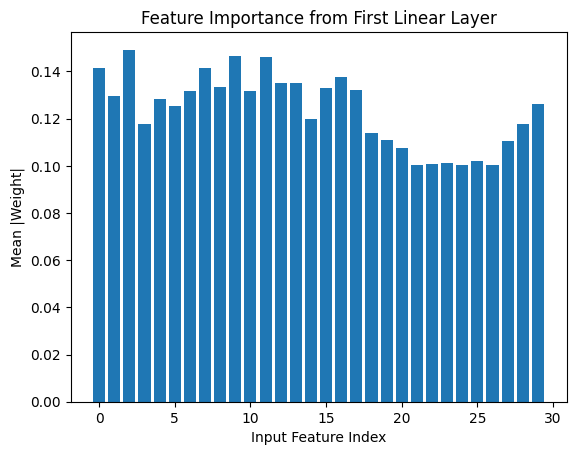

In [18]:
import matplotlib.pyplot as plt

plt.bar(range(len(avg_per_input_dim)), avg_per_input_dim)
plt.xlabel("Input Feature Index")
plt.ylabel("Mean |Weight|")
plt.title("Feature Importance from First Linear Layer")
plt.show()

In [ ]:
from ray.rllib.core.columns import Columns
from ray.rllib.core.models.base import ENCODER_OUT

# 构造一个样本输入 (batch_size=1, input_dim=30)
x = torch.zeros(1, 30, requires_grad=True)

# 正向传播
output = model({Columns.OBS: x})[ENCODER_OUT]

print(f"Output shape: {output['actor'].shape}")  # 输出形状

# 反向传播，计算 d(output)/d(x)
output['actor'].sum().backward()

# 获取每个输入维度的梯度绝对值作为重要性
contribution = x.grad.abs().squeeze().detach().numpy()

# 输出贡献度（形状为 [30]）
for i, val in enumerate(contribution):
    print(f"Input feature {i}: contribution = {val:.6f}")

Output shape: torch.Size([1, 256])
Input feature 0: contribution = 41.095398
Input feature 1: contribution = 39.611507
Input feature 2: contribution = 37.369129
Input feature 3: contribution = 18.750175
Input feature 4: contribution = 17.033916
Input feature 5: contribution = 33.897320
Input feature 6: contribution = 44.948372
Input feature 7: contribution = 40.694836
Input feature 8: contribution = 21.938318
Input feature 9: contribution = 89.674583
Input feature 10: contribution = 66.707626
Input feature 11: contribution = 22.846384
Input feature 12: contribution = 13.765870
Input feature 13: contribution = 33.350826
Input feature 14: contribution = 27.006268
Input feature 15: contribution = 28.489548
Input feature 16: contribution = 2.262063
Input feature 17: contribution = 21.415920
Input feature 18: contribution = 6.415111
Input feature 19: contribution = 32.262520
Input feature 20: contribution = 4.336918
Input feature 21: contribution = 4.537570
Input feature 22: contribution = 